import packages

In [2]:
import cartopy.util
import os as os
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker

os.chdir('/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/z_jupyternote/400y_study/')

useful link: https://stackoverflow.com/questions/57180317/making-sure-0-gets-white-in-a-rdbu-colorbar

#########################################
<br>Plot SMB for FIS alakeGLAC
<br>#########################################

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]


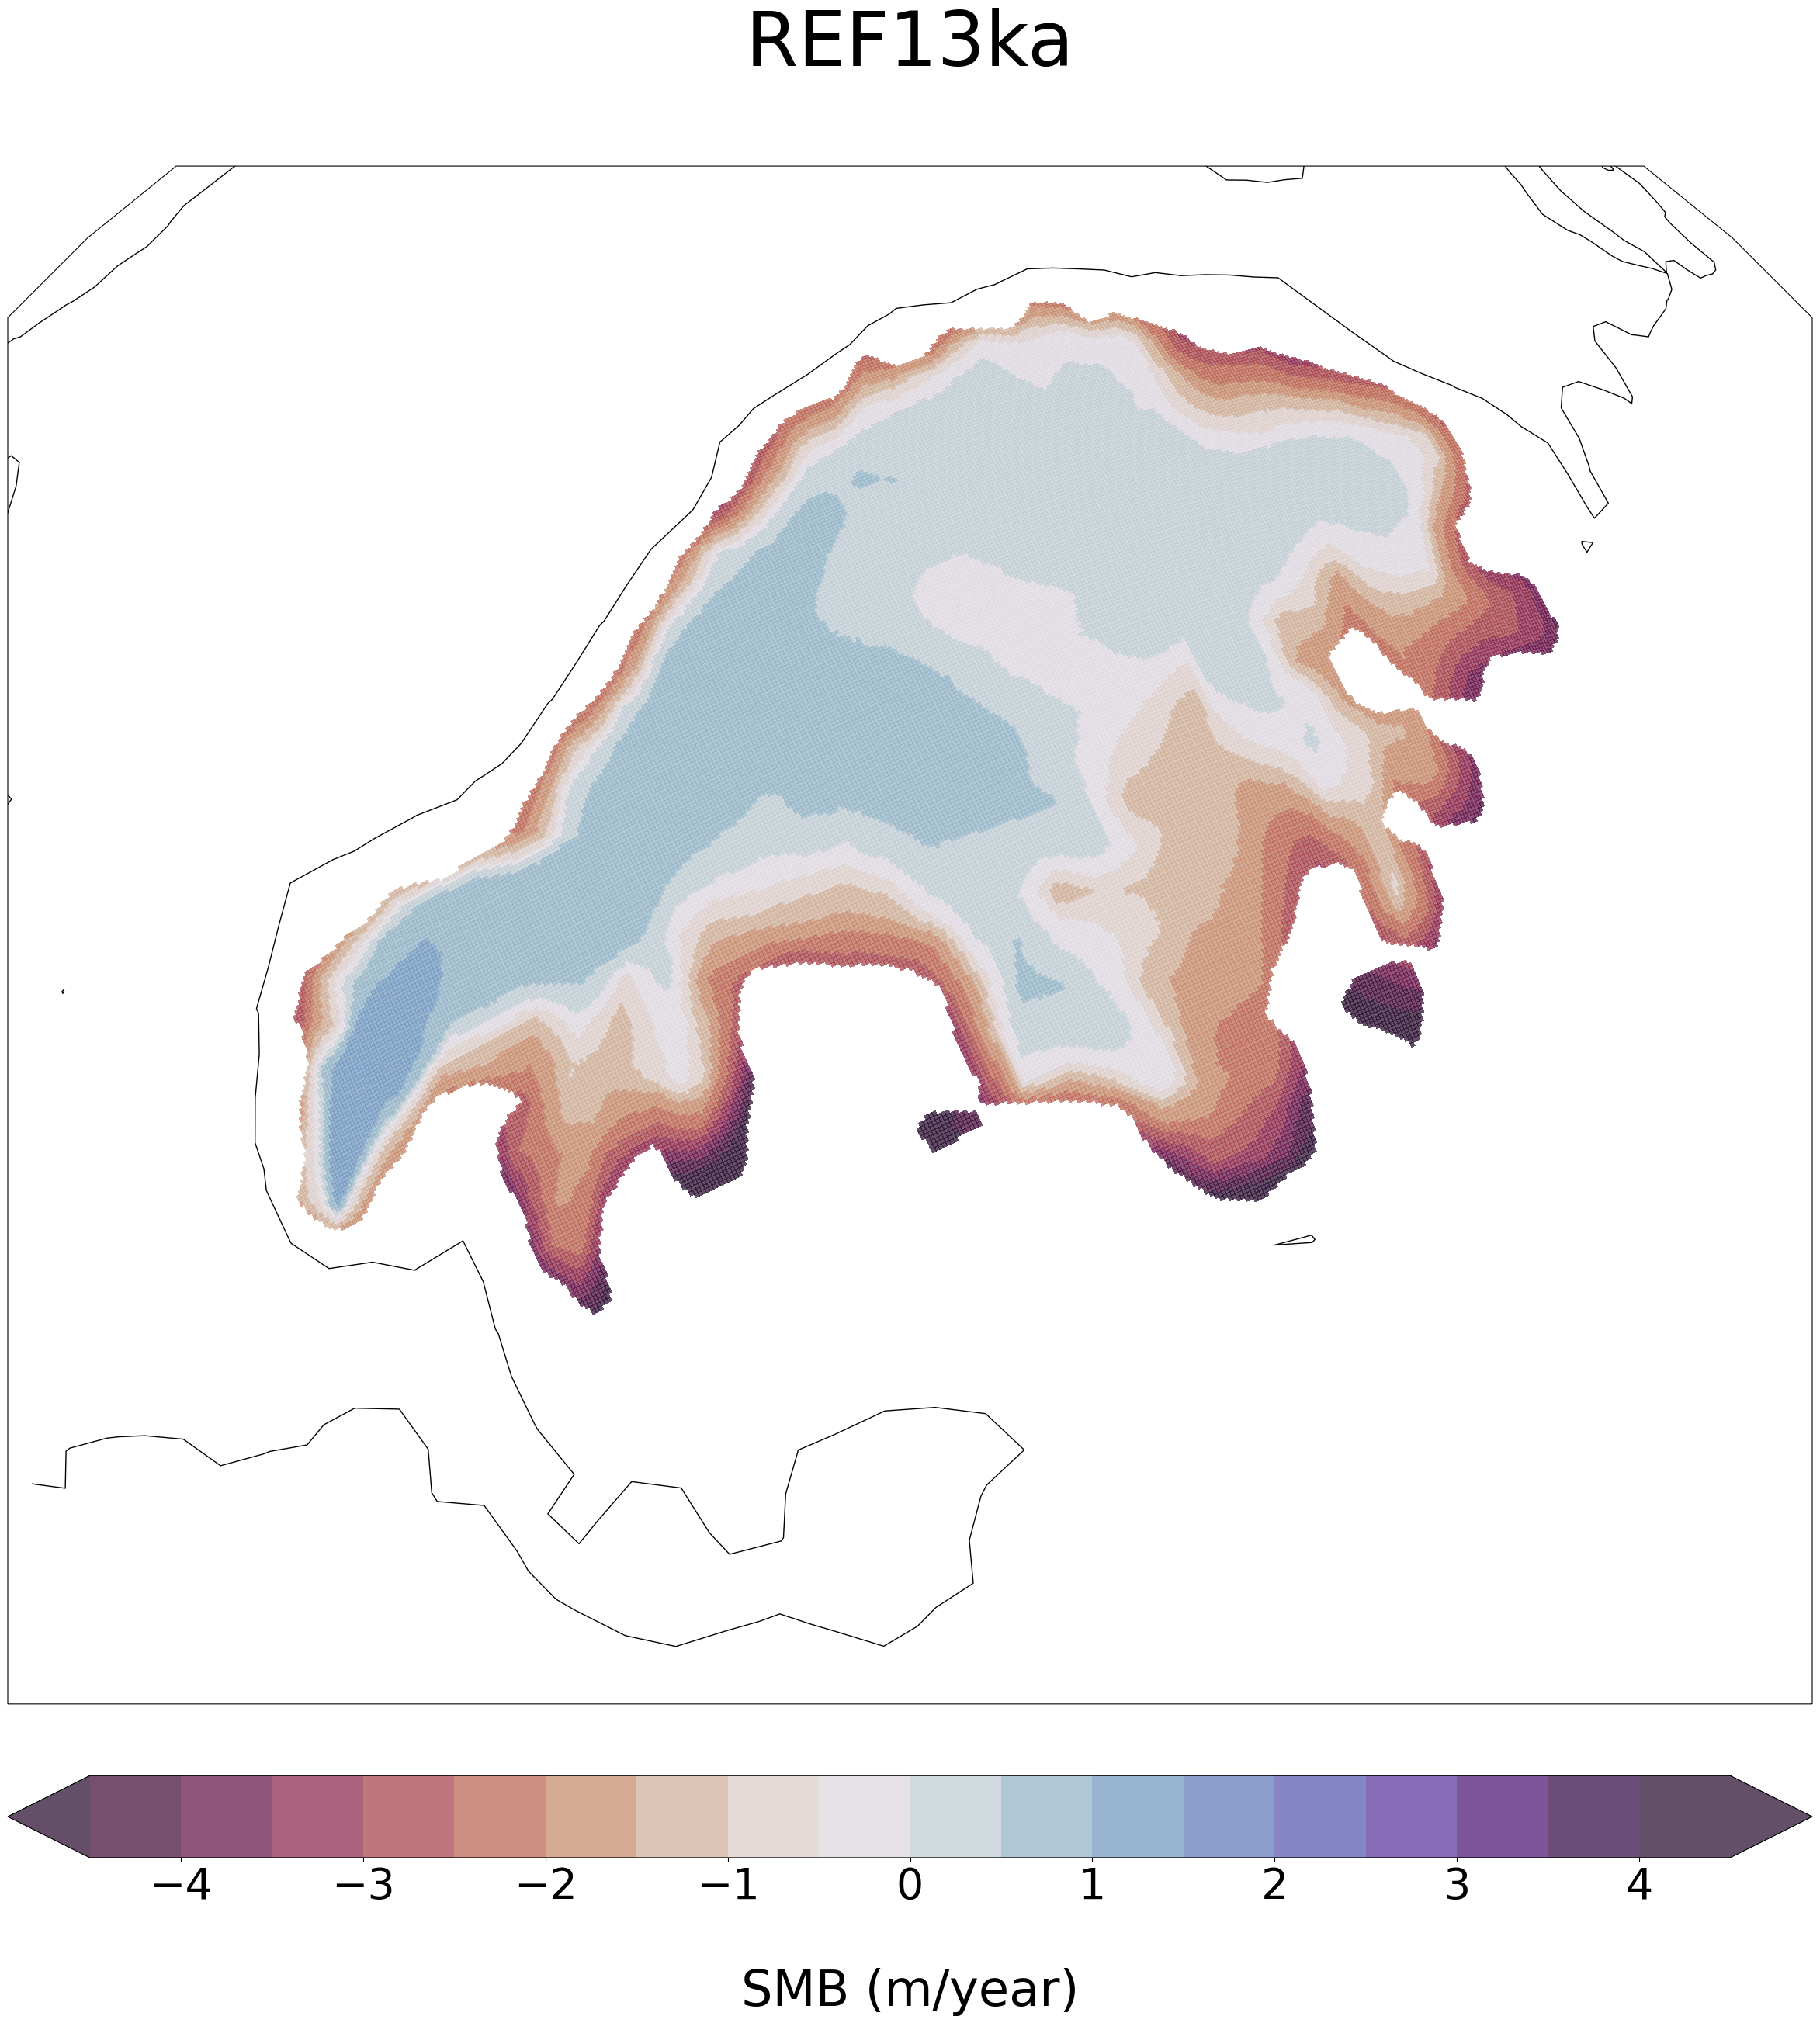

In [4]:
#from matplotlib.colors import TwoSlopeNorm

GLACL='/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/debm/3_debm_out/postproc/alakeGLAC.SMB_ym.nc'
GLACL_data=netcdf_dataset(GLACL)

BC='/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/boundary_conditions/bc_plake_nhem5km.nc' 
BC_data=netcdf_dataset(BC)
BCL='/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/boundary_conditions/TOPicemsk.15ka.nc' 
BCL_data=netcdf_dataset(BCL)

def makePlot(dvar, clon, clat, extent, vlev, label, cmap):
    
    #read variables from alakeGLAC
    varg=GLACL_data.variables[dvar][0,:,:]
    lats=GLACL_data.variables['lat'][:]
    lons=GLACL_data.variables['lon'][:]

    #jansurf input on 5km grid used for debm
    glac=BC_data.variables['GLAC'][:]
    plake=BC_data.variables['PLAKE'][:]
    lats5=BC_data.variables['lat'][:] 
    lons5=BC_data.variables['lon'][:]
    
    
    #levtarasov input
    slm=BCL_data.variables['HDC'][0,:,:]
    llats=BCL_data.variables['YLATGLOBP5'][:] 
    llons=BCL_data.variables['XLONGLOB1'][:]
    
    #creates figure
    fig_gp=plt.figure(figsize=(30,30))  
    
    #add charts to figure
    g01=plt.subplot(111,projection=ccrs.NearsidePerspective(central_longitude=clon, central_latitude=clat, satellite_height=700_000))

    #Setting the extent
    g01.set_extent(extent)

 
    ######################################
    #create figure alakeGLAC             #
    ######################################
    
    bounds=np.linspace(level_min, level_max, 21)
    print(bounds)
    
    norm=mcolors.BoundaryNorm(boundaries=bounds, ncolors=550)
    
    g01_fill=g01.pcolormesh(lons, lats, varg,
                            transform=ccrs.PlateCarree(),
                            norm=norm,
                            cmap=cmap,
                            alpha=0.75,
                           )
    
    g01_cbar=plt.colorbar(g01_fill, ax=g01,
                          orientation='horizontal',       
                          fraction=0.05, pad=0.04,
                          extend="both",
                          boundaries=bounds
                         )  
    
    ############
    #boundaries# 
    ############

    g01_slm=g01.contour(llons, llats, slm,
                        transform=ccrs.PlateCarree(),
                        interpolation="none", #why doesn't it affect plot??
                        levels=[0],
                        colors="black",
                        linewidths=1,
                        linestyles=["-"],
                       )
    g01.set_title(" REF13ka \n"
                  "",
                  fontsize=70
                 )
    g01_cbar.ax.tick_params(labelsize=40)
    g01_cbar.set_label(label, fontsize=46)
    
    #fig_gp.savefig('/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/z_jupyternote/400y_study/Figures/'+dvar+'_FIS_'+season+'_REF13ka.png')
    
    
    
    return



var_extent= [0,40,52,73]
level_min=-5
level_max=5
stepsize=0.25
var_levels=np.arange(level_min,level_max+stepsize,stepsize)
season="year"

makePlot(dvar='SMB', 
         clon=20,
         clat=60, 
         extent=var_extent,
         vlev = var_levels,
         label = "\n"
                 "SMB (m/"+season+")",
         cmap = "twilight_shifted_r",
        )

#########################################
<br>Plot SMB anomaly for FIS
<br>#########################################

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]


/home/ollie/lsijbran/.conda/envs/mypy37/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1478: UserWarning: No contour levels were found within the data range.
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


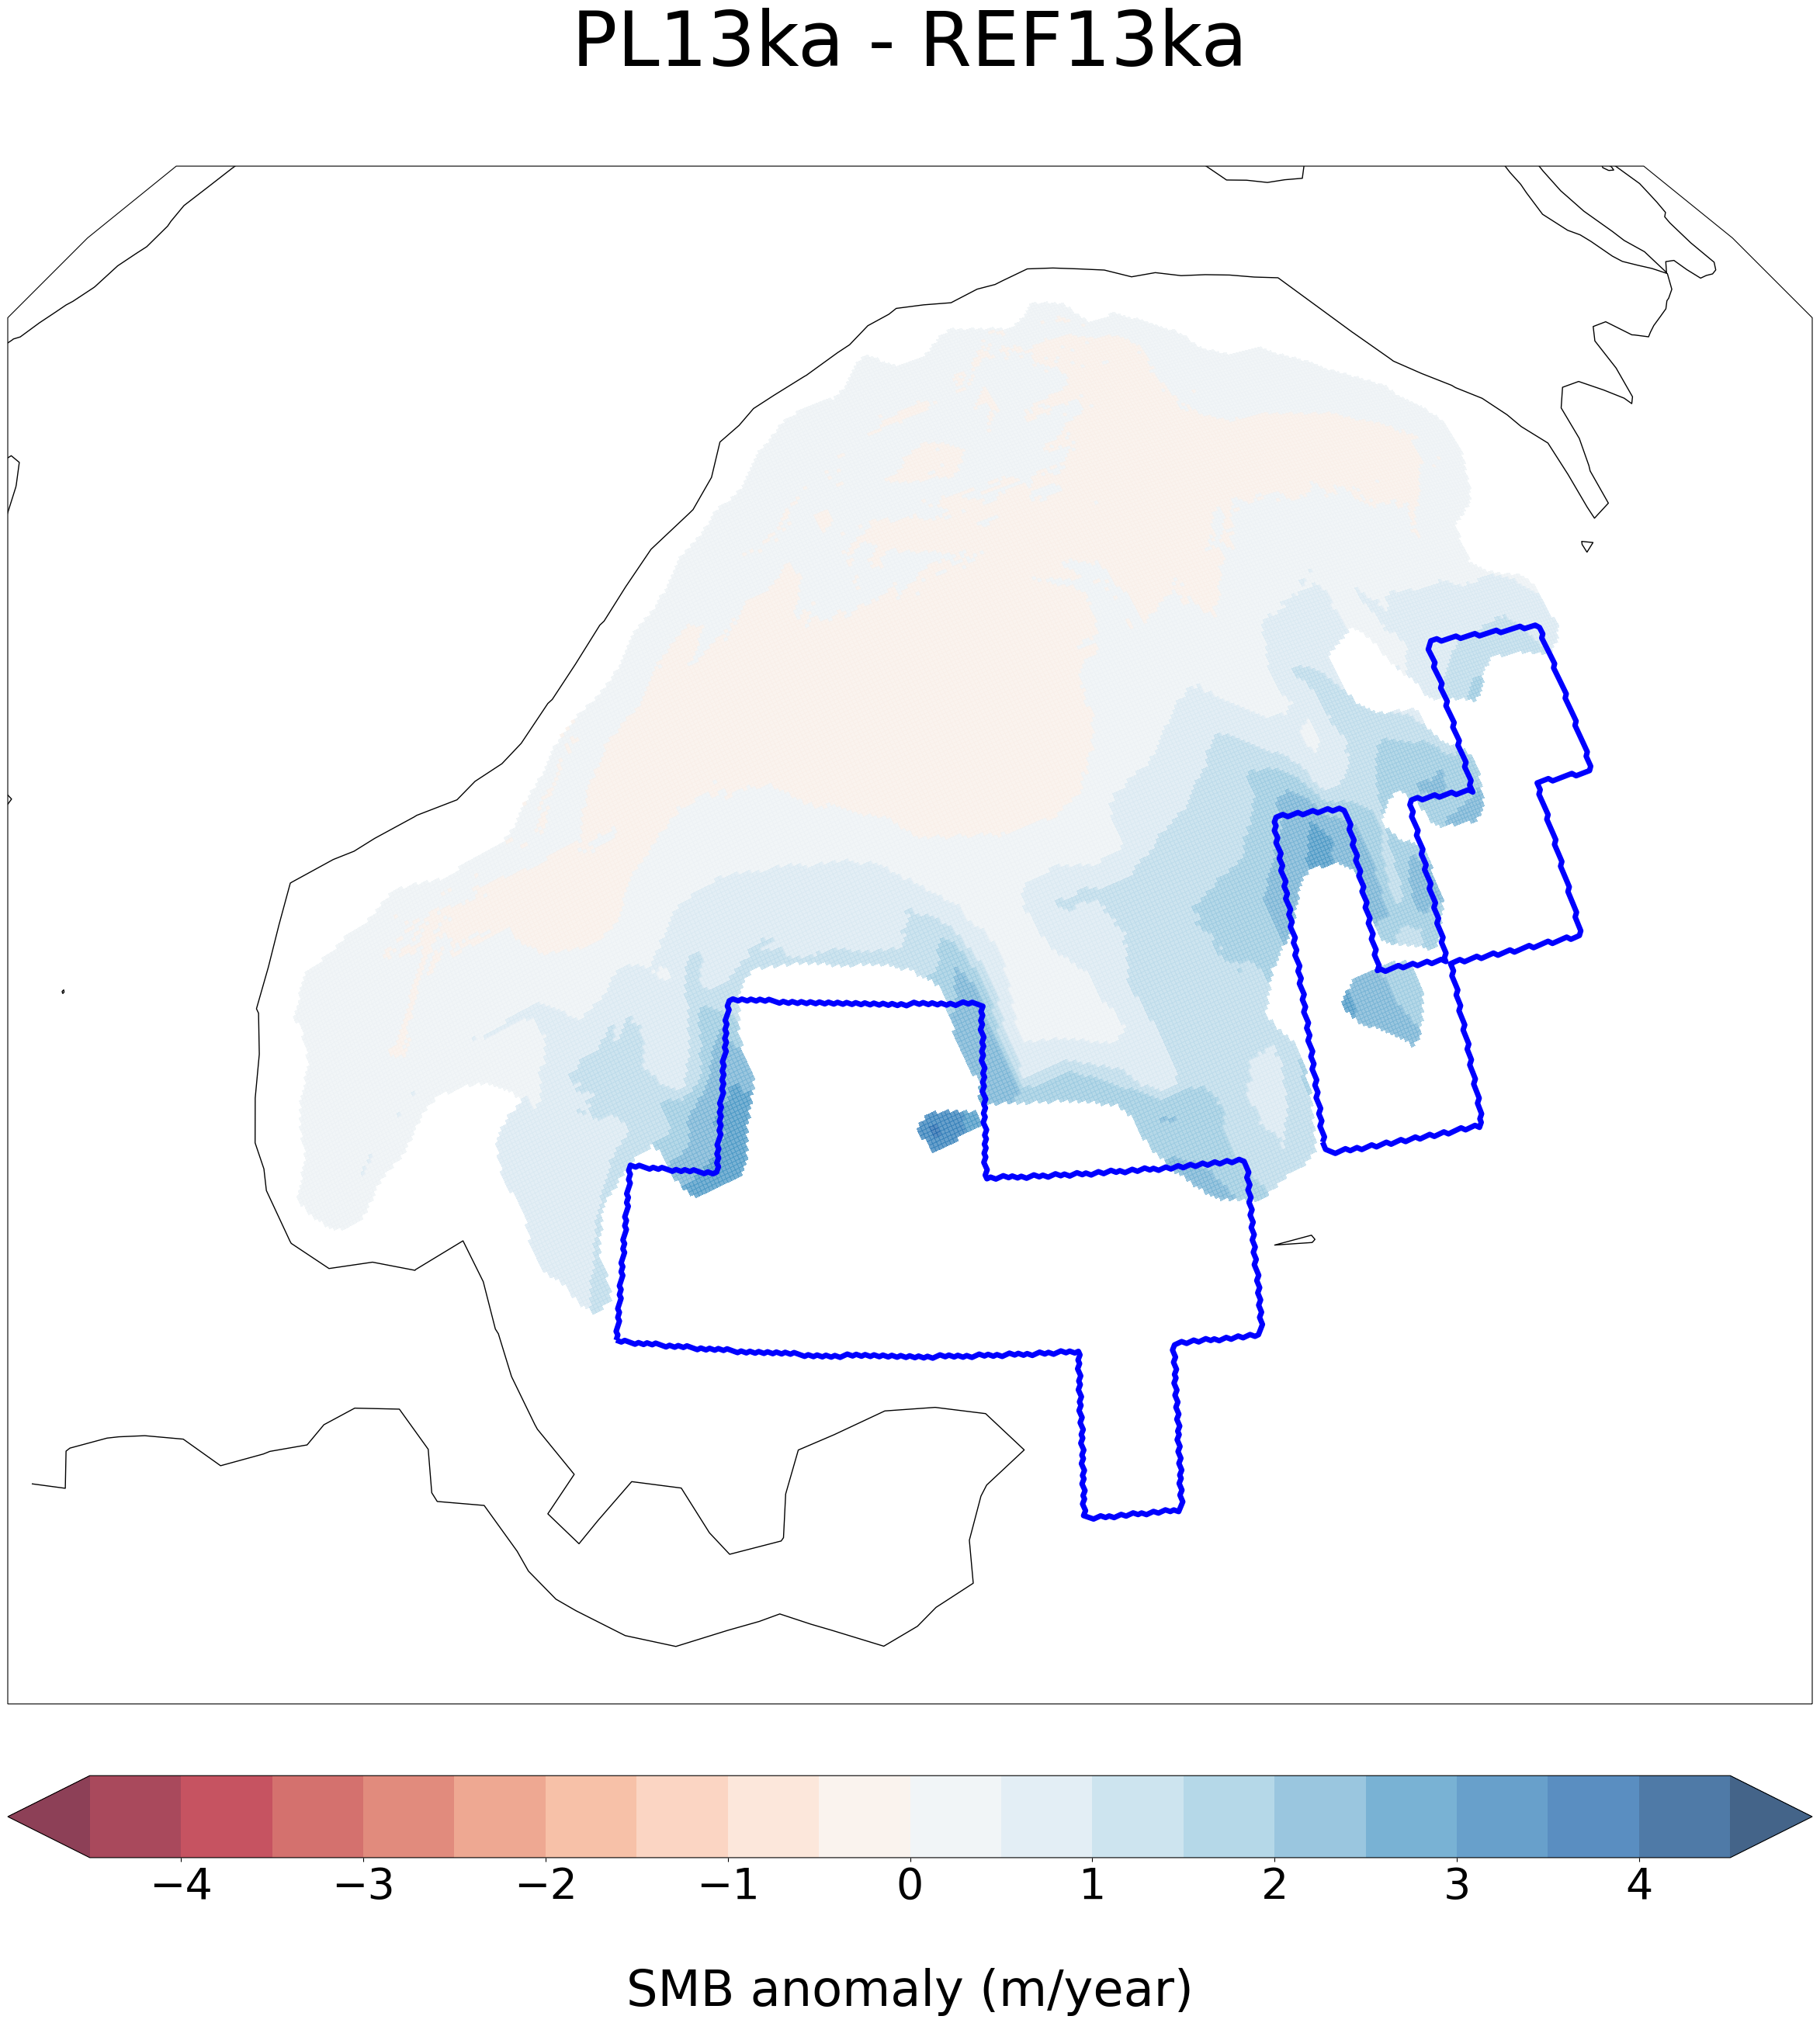

In [6]:
#Getting necessary packages
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm

#Reading the input netcdf files
PLAKE='/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/debm/3_debm_out/postproc/plake.SMB_ym.nc'
PLAKE_data=netcdf_dataset(PLAKE)
#ALAKE='/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/debm/3_debm_out/postproc/alake13ka.SMB_ym.nc'
#ALAKE_data=netcdf_dataset(ALAKE)
GLACL='/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/debm/3_debm_out/postproc/alakeGLAC.SMB_ym.nc'
GLACL_data=netcdf_dataset(GLACL)

BC='/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/boundary_conditions/bc_plake_nhem5km.nc' 
BC_data=netcdf_dataset(BC)
BCL='/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/boundary_conditions/TOPicemsk.15ka.nc' 
BCL_data=netcdf_dataset(BCL)

#start making a plot
def makePlot(dvar, clon, clat, extent, vlev, label, cmap):
    
    varp=PLAKE_data.variables[dvar][0,:,:] #LS adjust
    #vara=ALAKE_data.variables[dvar][0,:,:]  #LS adjust
    varg=GLACL_data.variables[dvar][0,:,:]  #LS adjust
    lats=PLAKE_data.variables['lat'][:]
    lons=PLAKE_data.variables['lon'][:]

    #jansurf input on 5km grid used for debm
    glac=BC_data.variables['GLAC'][:]
    plake=BC_data.variables['PLAKE'][:]
    lats5=BC_data.variables['lat'][:] 
    lons5=BC_data.variables['lon'][:]
    
    #levtarasov input
    slm=BCL_data.variables['HDC'][0,:,:]
    llats=BCL_data.variables['YLATGLOBP5'][:] 
    llons=BCL_data.variables['XLONGLOB1'][:]
    

    #creates figure space
    fig_gp=plt.figure(figsize=(30,30))  #option to add integer, 1 will add this number to the figure and hold this number as an attribute
    
    #adding charts to figure
    p01=plt.subplot(111,projection=ccrs.NearsidePerspective(central_longitude=clon, central_latitude=clat, satellite_height=700_000)) #122 stands for 1 row, 2 colums, position 2
    #a01=plt.subplot(121,projection=ccrs.NearsidePerspective(central_longitude=clon, central_latitude=clat, satellite_height=700_000)) #select projection here: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
    
    #Setting the extent
    p01.set_extent(extent)

 
    ##########################################################
    #create figure for anomaly between alakeGLAC and plake   #
    ##########################################################
    
    bounds=np.linspace(level_min, level_max, 21)
    print(bounds)
    
    norm=mcolors.BoundaryNorm(boundaries=bounds, ncolors=256)
    
    p01_fill=p01.pcolormesh(lons, lats, varp-varg,
                            transform=ccrs.PlateCarree(),
                            norm=norm,
                            cmap=cmap,
                            alpha=0.75,
                           )
    
    p01_cbar=plt.colorbar(p01_fill, ax=p01,
                          orientation='horizontal',       
                          fraction=0.05, pad=0.04,
                          extend="both",
                          boundaries=bounds
                         )  
    
    ############
    #boundaries# 
    ############

    p01_slm=p01.contour(llons, llats, slm,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="black",
                        linewidths=1,
                        linestyles=["-"],
                       )
    p01_plk=p01.contour(lons5, lats5, plake,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="blue",
                        linewidths=5,
                        linestyles=["-"],
                        #linestyles=["-."],
                        )
    p01.set_title(" PL13ka - REF13ka \n"
                  "",
                  fontsize=70
                 )
    p01_cbar.ax.tick_params(labelsize=40)
    p01_cbar.set_label(label, fontsize=46)

    #fig_gp.savefig('/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/z_jupyternote/400y_study/Figures/'+dvar+'_FIS_'+season+'_anom_p.png')
    
    
    
    return




#projection=ccrs.Orthographic(central_latitude=70, central_longitude=-90)) #LIS



var_extent= [0,40,52,73]
level_min=-5
level_max=5
stepsize=0.25
var_levels=np.arange(level_min,level_max+stepsize,stepsize)
season="year"

makePlot(dvar='SMB', 
         clon=20,
         clat=60, 
         extent=var_extent,
         vlev = var_levels,
         label = "\n"
                 "SMB anomaly (m/"+season+")",
         cmap = "RdBu",
        )

#########################################
<br>Plot SMB for LIS alakeGLAC
<br>#########################################

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]


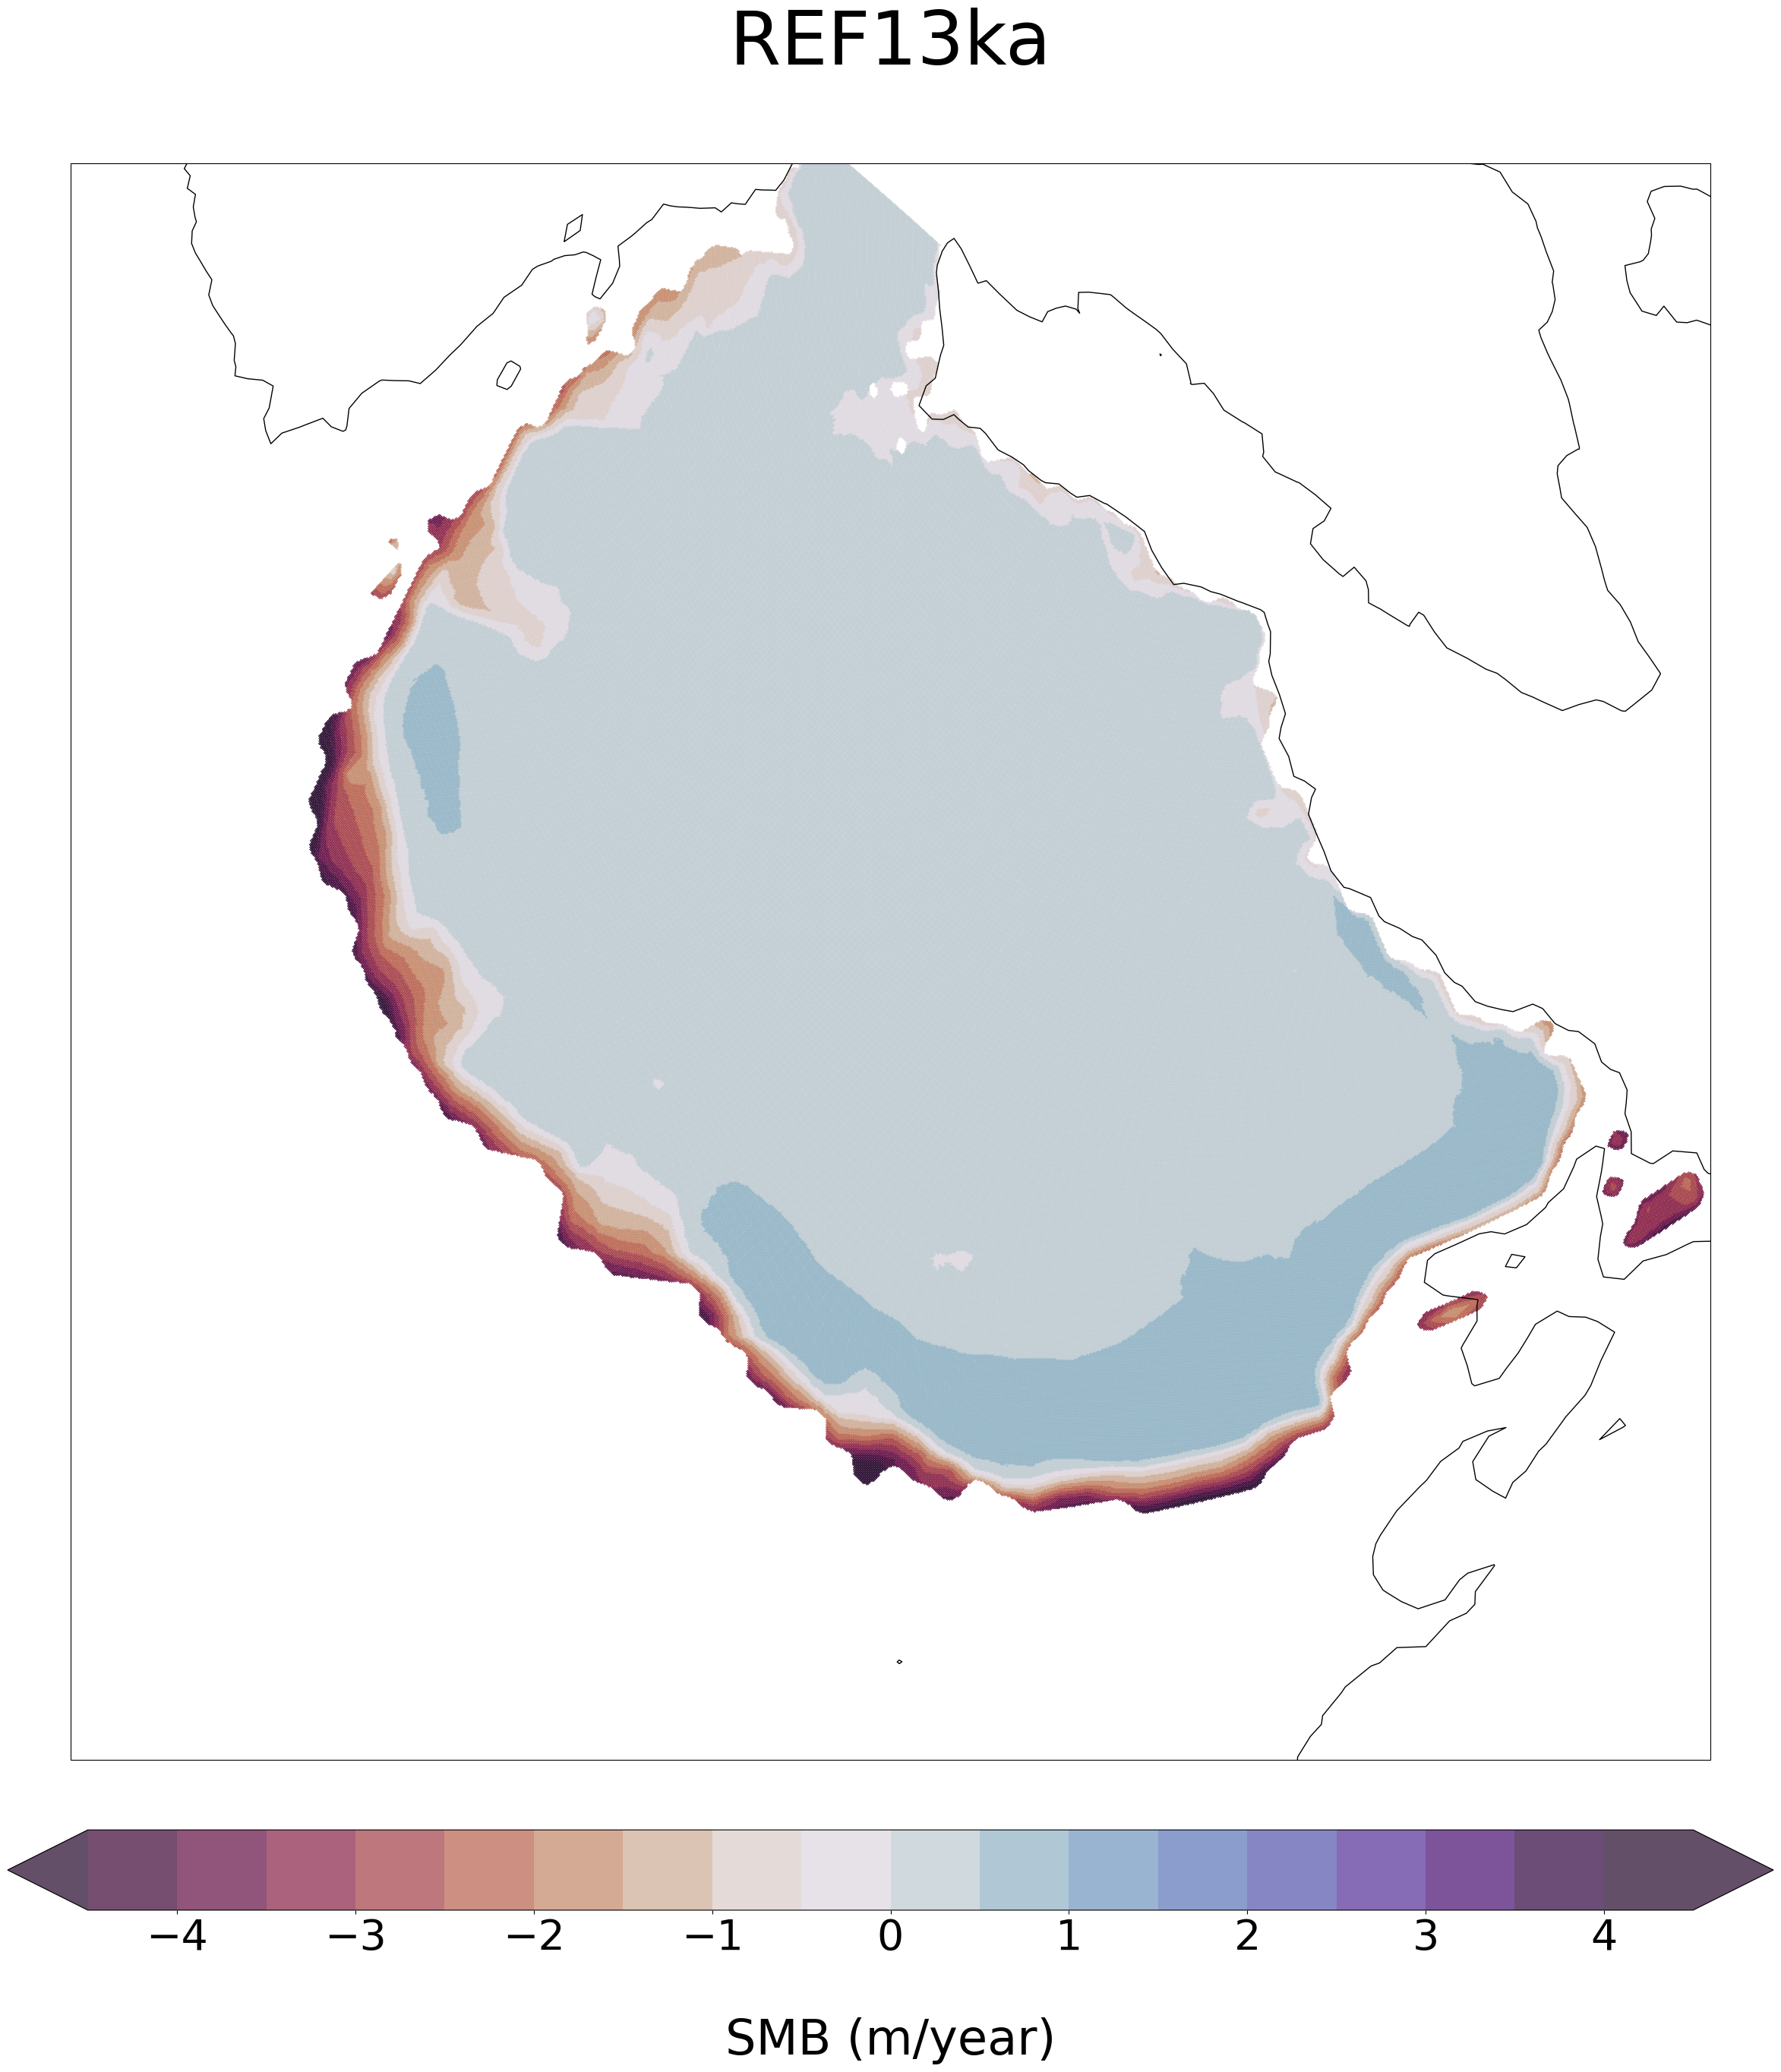

In [8]:
#from matplotlib.colors import TwoSlopeNorm

GLACL='/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/debm/3_debm_out/postproc/alakeGLAC.SMB_ym.nc'
GLACL_data=netcdf_dataset(GLACL)

BC='/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/boundary_conditions/bc_plake_nhem5km.nc' 
BC_data=netcdf_dataset(BC)
BCL='/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/boundary_conditions/TOPicemsk.15ka.nc' 
BCL_data=netcdf_dataset(BCL)

def makePlot(dvar, clon, clat, extent, vlev, label, cmap):
    
    #read variables from alakeGLAC
    varg=GLACL_data.variables[dvar][0,:,:]
    lats=GLACL_data.variables['lat'][:]
    lons=GLACL_data.variables['lon'][:]

    #jansurf input on 5km grid used for debm
    glac=BC_data.variables['GLAC'][:]
    plake=BC_data.variables['PLAKE'][:]
    lats5=BC_data.variables['lat'][:] 
    lons5=BC_data.variables['lon'][:]
    
    
    #levtarasov input
    slm=BCL_data.variables['HDC'][0,:,:]
    llats=BCL_data.variables['YLATGLOBP5'][:] 
    llons=BCL_data.variables['XLONGLOB1'][:]
    
    #creates figure
    fig_gp=plt.figure(figsize=(30,30))  
    
    #add charts to figure
    g01=plt.subplot(111,projection=ccrs.NearsidePerspective(central_longitude=clon, central_latitude=clat, satellite_height=10_000_000)) 

    #Setting the extent
    g01.set_extent(extent)

 
    ##################################################
    #create figure for alakeGLAC                     #
    ##################################################
    
    bounds=np.linspace(level_min, level_max, 21)
    print(bounds)
    
    norm=mcolors.BoundaryNorm(boundaries=bounds, ncolors=550)
    
    g01_fill=g01.pcolormesh(lons, lats, varg,
                            transform=ccrs.PlateCarree(),
                            norm=norm,
                            cmap=cmap,
                            alpha=0.75,
                           )
    
    g01_cbar=plt.colorbar(g01_fill, ax=g01,
                          orientation='horizontal',       
                          fraction=0.05, pad=0.04,
                          extend="both",
                          boundaries=bounds
                         )  
    
    ############
    #boundaries# 
    ############

    g01_slm=g01.contour(llons, llats, slm,
                        transform=ccrs.PlateCarree(),
                        interpolation="none", #why doesn't it affect plot??
                        levels=[0],
                        colors="black",
                        linewidths=1,
                        linestyles=["-"],
                       )
    g01.set_title(" REF13ka \n"
                  "",
                  fontsize=70
                 )
    g01_cbar.ax.tick_params(labelsize=40)
    g01_cbar.set_label(label, fontsize=46)
    
    #fig_gp.savefig('/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/z_jupyternote/400y_study/Figures/'+dvar+'_LIS_'+season+'_REF13ka.png')
    
    
    
    return



var_extent= [-115,-60,35,80]
level_min=-5
level_max=5
stepsize=0.25
var_levels=np.arange(level_min,level_max+stepsize,stepsize)
season="year"

makePlot(dvar='SMB', 
         clon=-90,
         clat=60, 
         extent=var_extent,
         vlev = var_levels,
         label = "\n"
                 "SMB (m/"+season+")",
         cmap = "twilight_shifted_r",
        )

#########################################
<br>Plot SMB anomaly for LIS
<br>#########################################

[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]


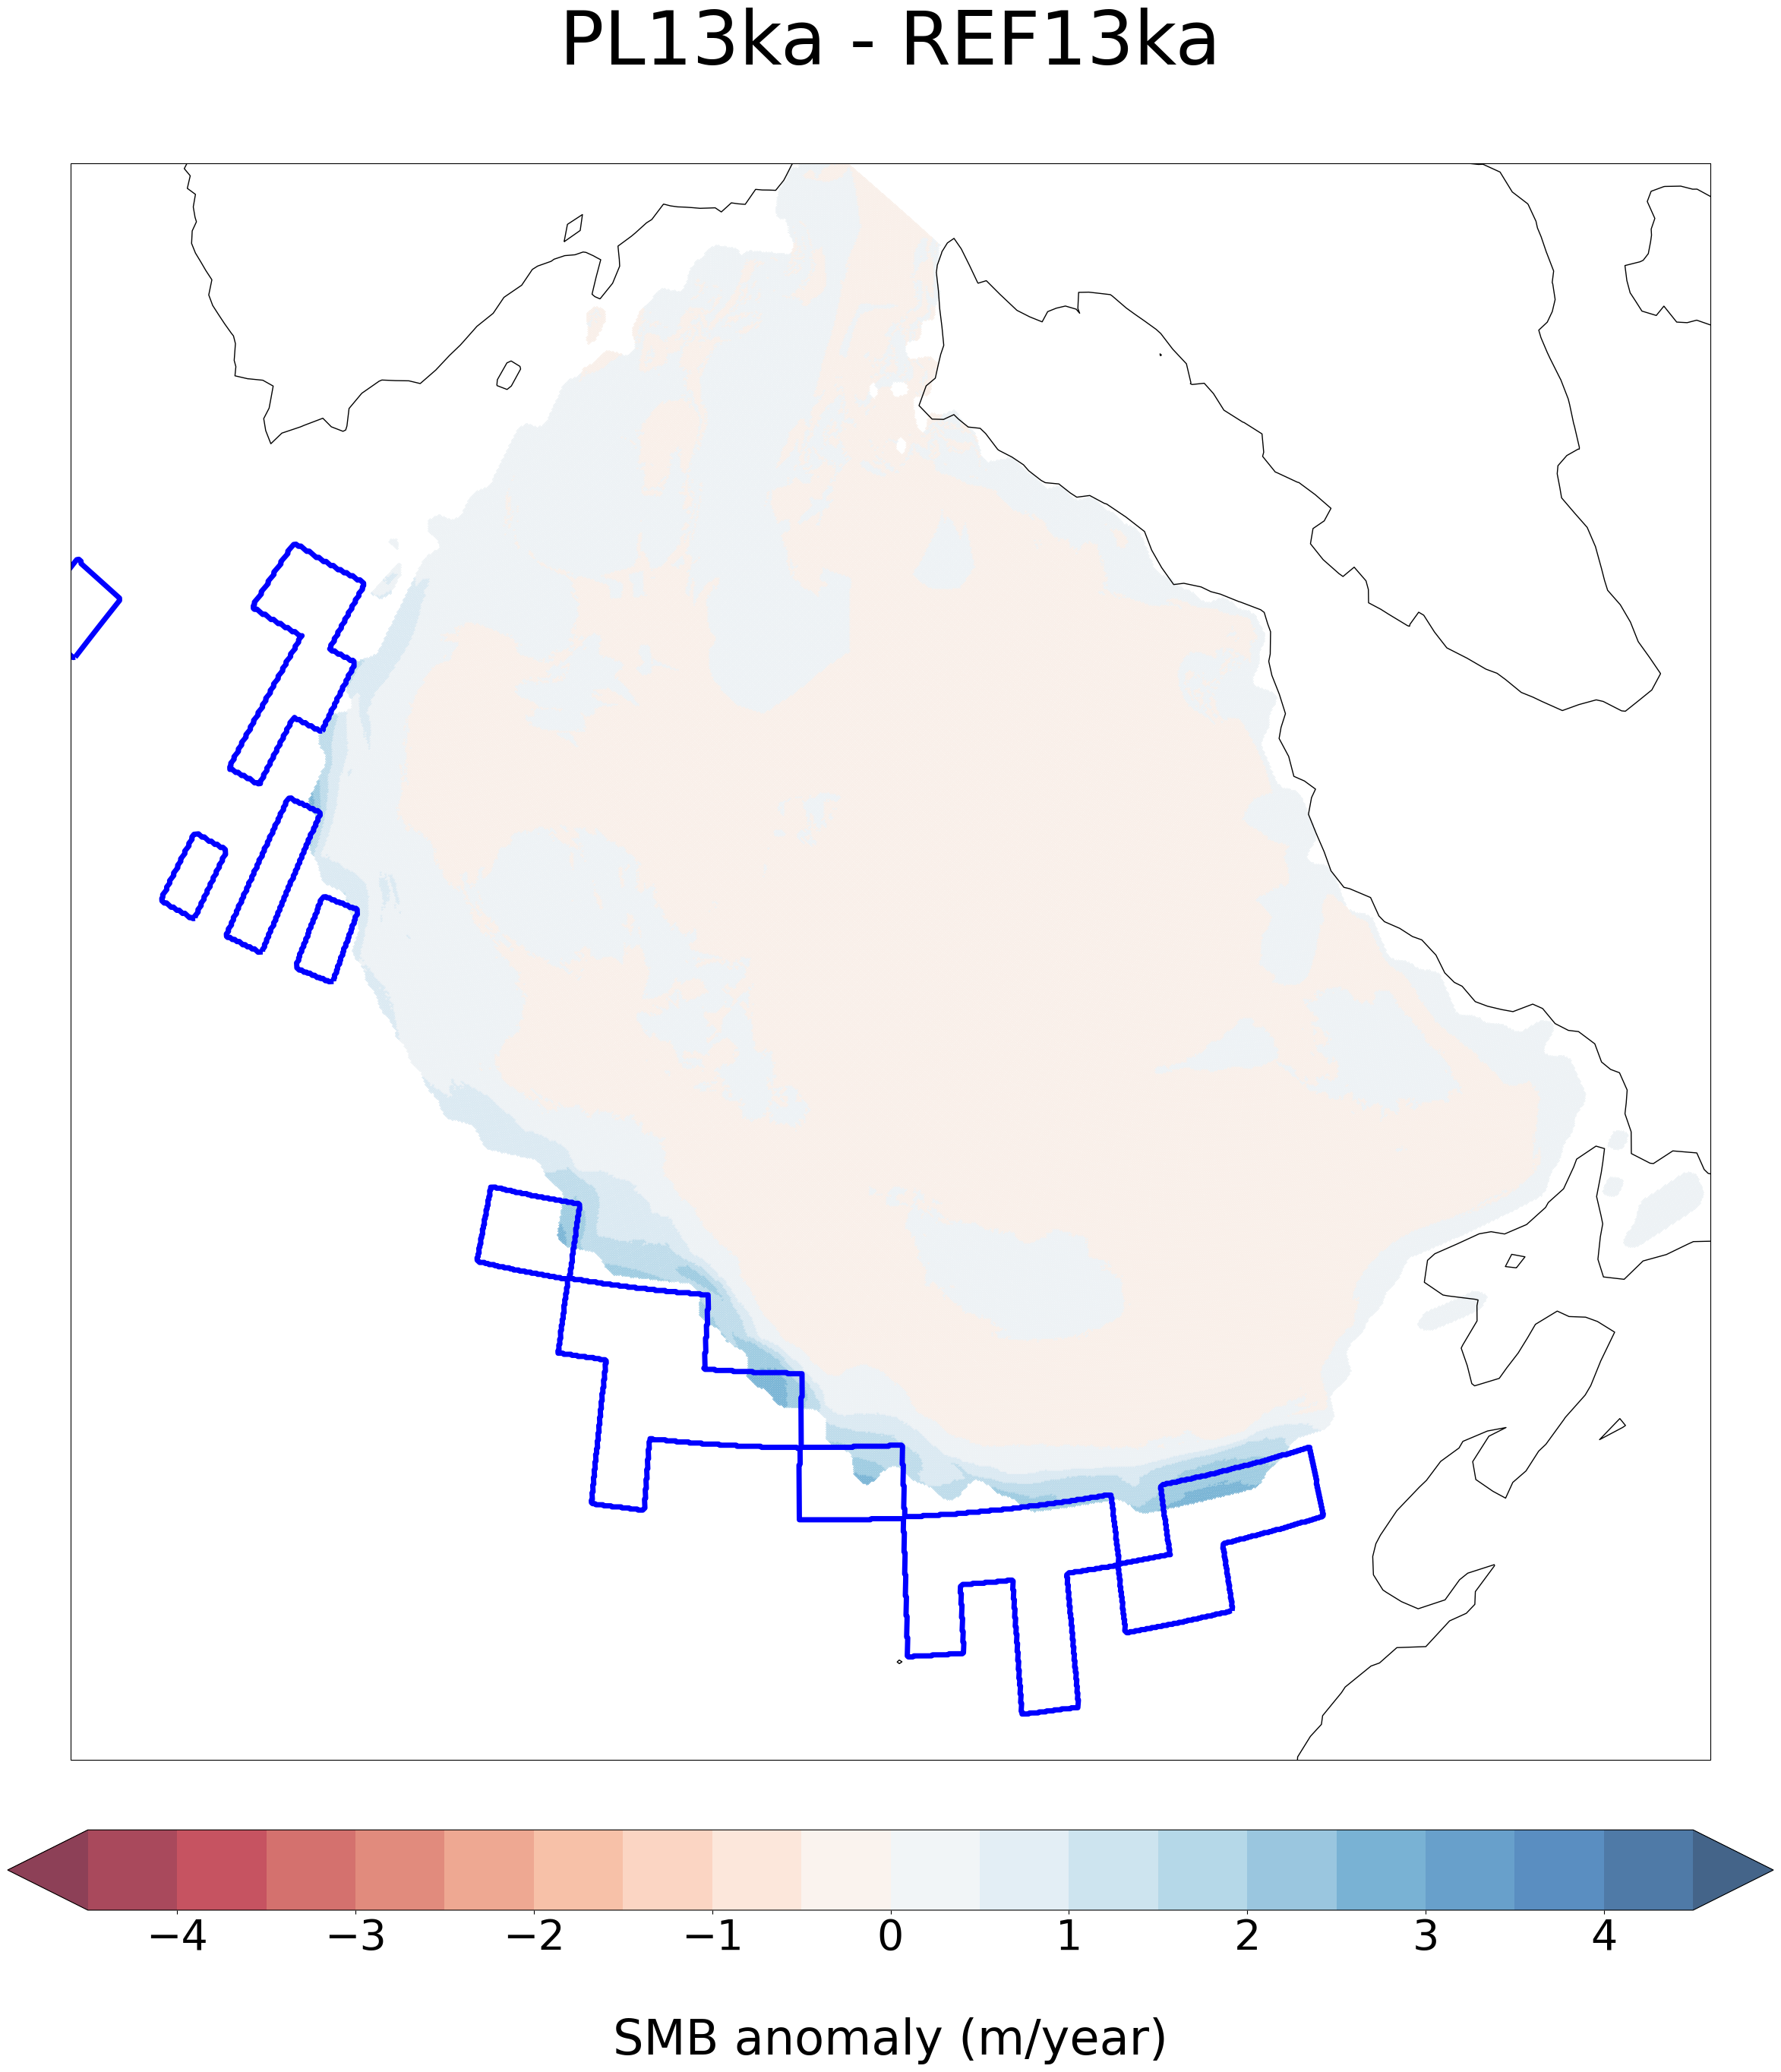

In [9]:
#Getting necessary packages
import matplotlib.pyplot as plt
from netCDF4 import Dataset as netcdf_dataset
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import TwoSlopeNorm

#Reading the input netcdf files
PLAKE='/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/debm/3_debm_out/postproc/plake.SMB_ym.nc'
PLAKE_data=netcdf_dataset(PLAKE)
#ALAKE='/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/debm/3_debm_out/postproc/alake13ka.SMB_ym.nc'
#ALAKE_data=netcdf_dataset(ALAKE)
GLACL='/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/debm/3_debm_out/postproc/alakeGLAC.SMB_ym.nc'
GLACL_data=netcdf_dataset(GLACL)

BC='/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/boundary_conditions/bc_plake_nhem5km.nc' 
BC_data=netcdf_dataset(BC)
BCL='/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/boundary_conditions/TOPicemsk.15ka.nc' 
BCL_data=netcdf_dataset(BCL)

#start making a plot
def makePlot(dvar, clon, clat, extent, vlev, label, cmap):
    
    varp=PLAKE_data.variables[dvar][0,:,:] #LS adjust
    #vara=ALAKE_data.variables[dvar][0,:,:]  #LS adjust
    varg=GLACL_data.variables[dvar][0,:,:]  #LS adjust
    lats=PLAKE_data.variables['lat'][:]
    lons=PLAKE_data.variables['lon'][:]

    #jansurf input on 5km grid used for debm
    glac=BC_data.variables['GLAC'][:]
    plake=BC_data.variables['PLAKE'][:]
    lats5=BC_data.variables['lat'][:] 
    lons5=BC_data.variables['lon'][:]
    
    #levtarasov input
    slm=BCL_data.variables['HDC'][0,:,:]
    llats=BCL_data.variables['YLATGLOBP5'][:] 
    llons=BCL_data.variables['XLONGLOB1'][:]
    

    #creates figure space
    fig_gp=plt.figure(figsize=(30,30))  #option to add integer, 1 will add this number to the figure and hold this number as an attribute
    
    #adding charts to figure
    p01=plt.subplot(111,projection=ccrs.NearsidePerspective(central_longitude=clon, central_latitude=clat, satellite_height=10_000_000)) 
    #a01=plt.subplot(121,projection=ccrs.NearsidePerspective(central_longitude=clon, central_latitude=clat, satellite_height=700_000)) #select projection here: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
    
    #Setting the extent
    p01.set_extent(extent)

 
    ##########################################################
    #create figure for anomaly between alakeGLAC and plake   #
    ##########################################################
    
    bounds=np.linspace(level_min, level_max, 21)
    print(bounds)
    
    norm=mcolors.BoundaryNorm(boundaries=bounds, ncolors=256)
    
    p01_fill=p01.pcolormesh(lons, lats, varp-varg,
                            transform=ccrs.PlateCarree(),
                            norm=norm,
                            cmap=cmap,
                            alpha=0.75,
                           )
    
    p01_cbar=plt.colorbar(p01_fill, ax=p01,
                          orientation='horizontal',       
                          fraction=0.05, pad=0.04,
                          extend="both",
                          boundaries=bounds
                         )  
    
    ############
    #boundaries# 
    ############

    p01_slm=p01.contour(llons, llats, slm,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="black",
                        linewidths=1,
                        linestyles=["-"],
                       )
    p01_plk=p01.contour(lons5, lats5, plake,
                        transform=ccrs.PlateCarree(),
                        levels=[0],
                        colors="blue",
                        linewidths=5,
                        linestyles=["-"],
                        #linestyles=["-."],
                        )
    p01.set_title(" PL13ka - REF13ka \n"
                  "",
                  fontsize=70
                 )
    p01_cbar.ax.tick_params(labelsize=40)
    p01_cbar.set_label(label, fontsize=46)

    #fig_gp.savefig('/work/ollie/lsijbran/climate-feedbacks-proglacial-lakes/z_jupyternote/400y_study/Figures/'+dvar+'_LIS_'+season+'_anom_p.png')
    
    
    
    return

var_extent= [-115,-60,35,80]
level_min=-5
level_max=5
stepsize=0.25
var_levels=np.arange(level_min,level_max+stepsize,stepsize)
season="year"

makePlot(dvar='SMB', 
         clon=-90,
         clat=60, 
         extent=var_extent,
         vlev = var_levels,
         label = "\n"
                 "SMB anomaly (m/"+season+")",
         cmap = "RdBu",
        )